In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/content/Netflix Dataset 1.csv')


In [ ]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [ ]:
print("\nBasic Statistics:")
display(df.describe(include='all'))


Basic Statistics:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns


In [ ]:
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
    df[col] = df[col].astype('category')

# Convert 'release_year' to integer if not already
if 'release_year' in df.columns:
    df['release_year'] = df['release_year'].astype(int)

/tmp/ipython-input-2873221367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2873221367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

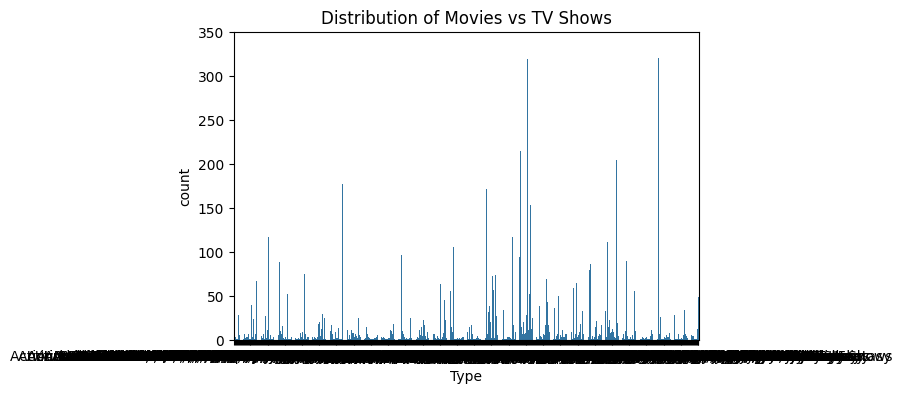

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Movies vs TV Shows')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', hue='type', data=df)
plt.title('Movies vs TV Shows Over Years')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `release_year` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
df['release_year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
df['release_year'].fillna(df['release_year'].mode()[0], inplace=True)
df['release_year'] = df['release_year'].astype(int)

/tmp/ipython-input-1336073630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['release_year'].fillna(df['release_year'].mode()[0], inplace=True)


/tmp/ipython-input-483080946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_type_counts = df.groupby(['release_year','Type']).size().unstack().fillna(0)


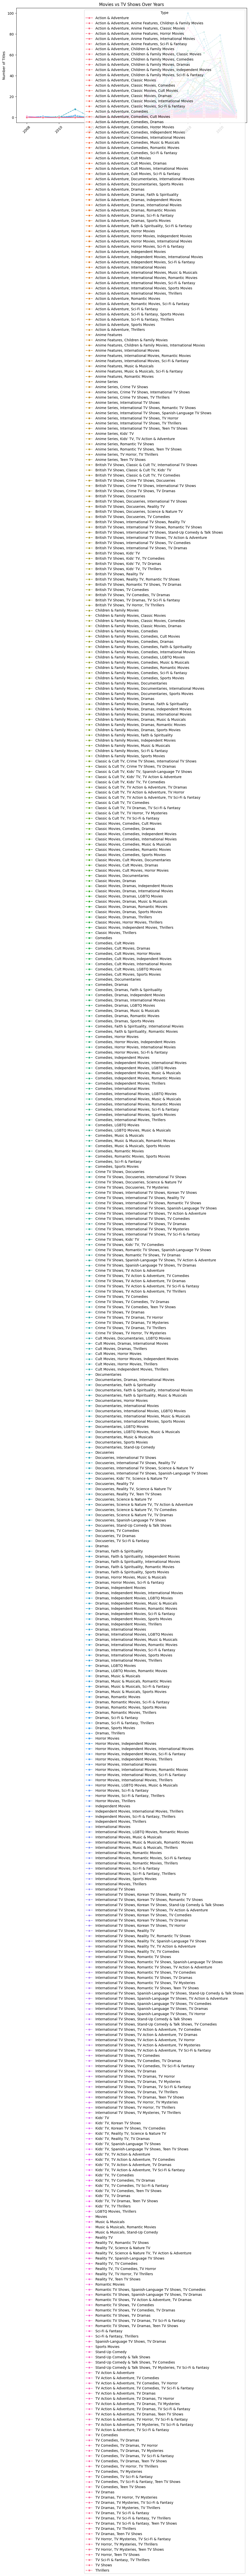

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', hue='Type', data=df)
plt.title('Movies vs TV Shows Over Years')
plt.xticks(rotation=45)
plt.show()

NameError: name 'output_folder' is not defined

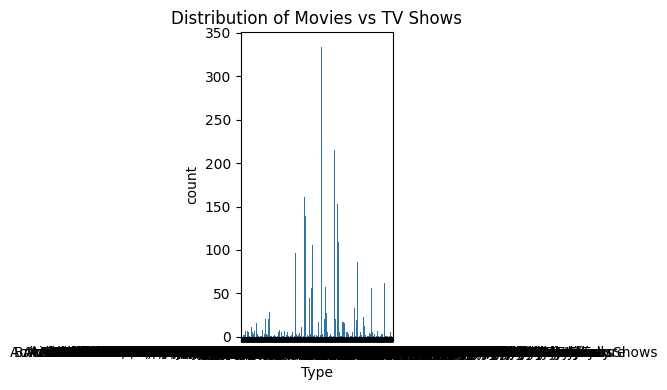

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Movies vs TV Shows')
plt.tight_layout()
plt.savefig(f'{output_folder}/movies_vs_tv.png', dpi=300)
plt.close()  # Close the plot to save memory

In [40]:
output_folder = 'netflix_bar_graphs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

sns.set(style="whitegrid")

# -----------------------------
# 1. Movies vs TV Shows Count
# -----------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df, palette='Set2', hue='Type', legend=False)
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig(f'{output_folder}/movies_vs_tv.png', dpi=300)
plt.close()

In [44]:
df_country = df.copy()
df_country['Country'] = df_country['Country'].str.split(', ')
df_country = df_country.explode('Country')
top_countries = df_country['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set1', hue=top_countries.index, legend=False)
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(f'{output_folder}/top_10_countries.png', dpi=300)
plt.close()

print(f"Bar graphs saved in folder: {output_folder}")

Bar graphs saved in folder: netflix_bar_graphs
